# `check_shift.ipynb`

## Introduction

This notebook aims at vizualizing the effects of misaligned field magnitudes with respect to their respective Fourier transform magnitudes.

This scenario is most likely to happen when dealing with experimental records.

## Imports and synthetic data loading (speckle)

Load libraries

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import speckleret

Load pre-computed example speckle field (computed from a GRIN fiber simulation) and compute its Fourier transform

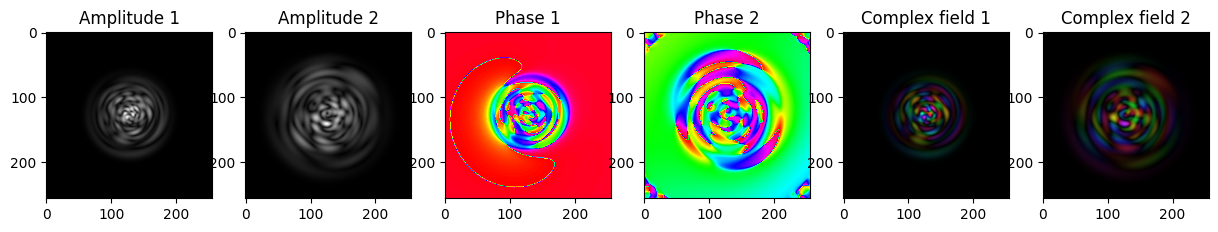

In [3]:
field = np.load('../imports/grin_speckle_example.npy')
ft_field = speckleret.transforms.fourier_transform(field, pad=2)
_ = speckleret.plots.compare_complex_fields(field, ft_field)

## Run phase retrieval on the computed fields

Let's first generate the support constraint from thresholding and visualize the support

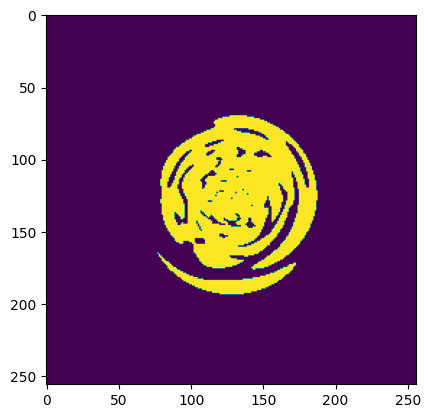

In [4]:
support = speckleret.supports.threshold_support(field, threshold=0.01)
plt.imshow(support)
plt.show()

Let's now attempt to retreieve the phase of tha field from the field magnitude and the Fourier magnitude using HIO + ER

In [5]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(field), np.abs(ft_field)), support, pad=2, max_iter=2, max_er_iter=200, max_hio_iter=100)

1 / 2
2 / 2


Let's visualize the convergence results, that is the Fourier magnitude simularity across iterations and the complex dot product between the iterate and the groundtruth

Quality: 0.989066824087613
Pearson: 1.0


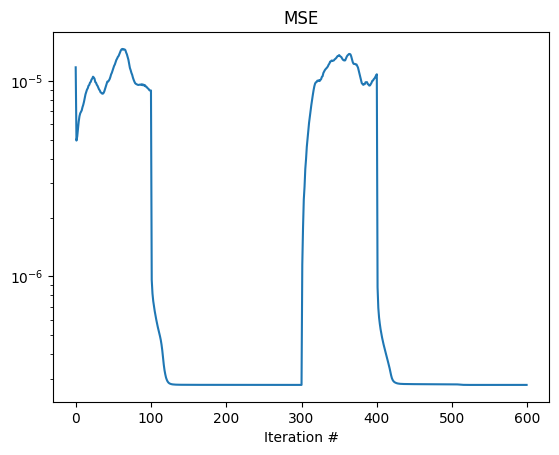

In [6]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], field[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

Let's visualize the retrieved field

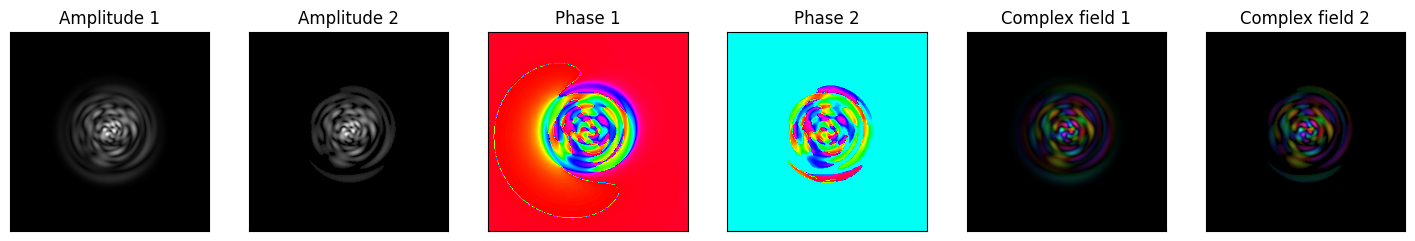

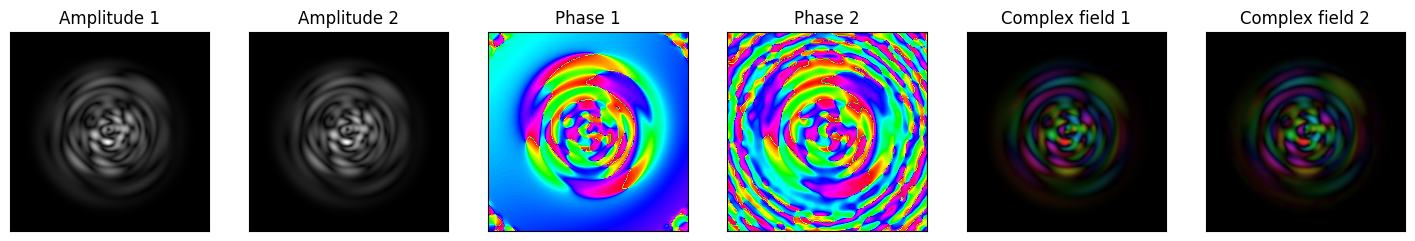

In [7]:
_ = speckleret.plots.compare_complex_fields(field, y_hat, remove_ticks=True, figsize=(18,9))
_ = speckleret.plots.compare_complex_fields(ft_field, ft_hat, remove_ticks=True, figsize=(18,9))

And finally the phase difference on the support, which should have an almost flat color

Phase error:
  - Mean: -0.28808 rad
  - Std: 0.14333 rad


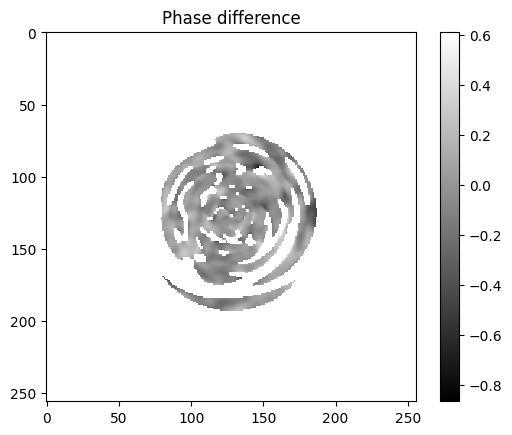

In [11]:
speckleret.plots.phase_difference(y_hat, field, support)

## Generate a shifted field

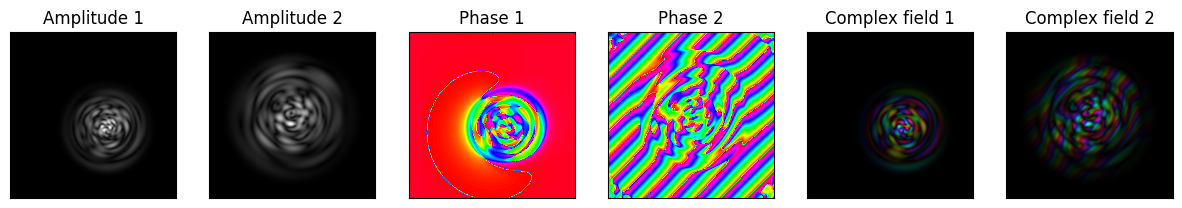

In [3]:
shift = (20,20)
shifted_field = np.roll(field, shift=shift, axis=(0,1))
shifted_ft = speckleret.transforms.fourier_transform(shifted_field, pad=2)
_ = speckleret.plots.compare_complex_fields(shifted_field, shifted_ft, remove_ticks=True)

## Generate and visualize support

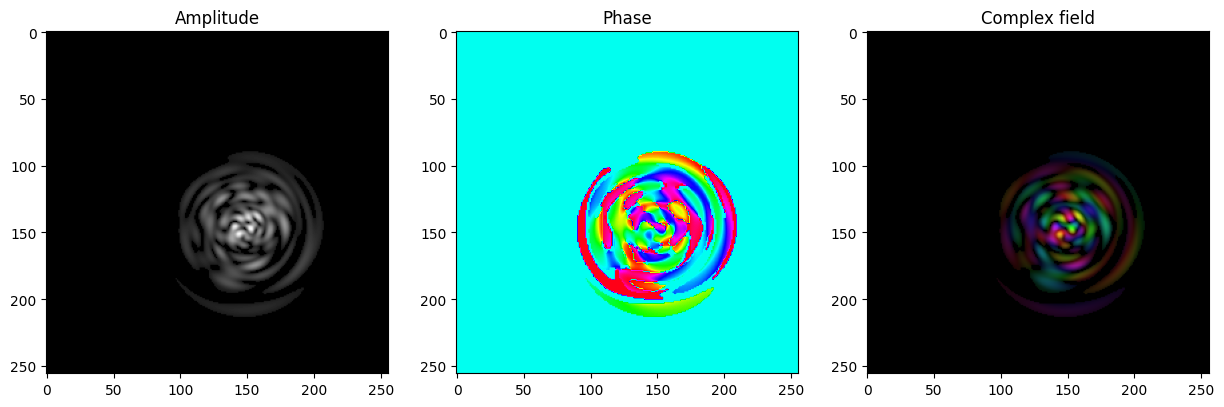

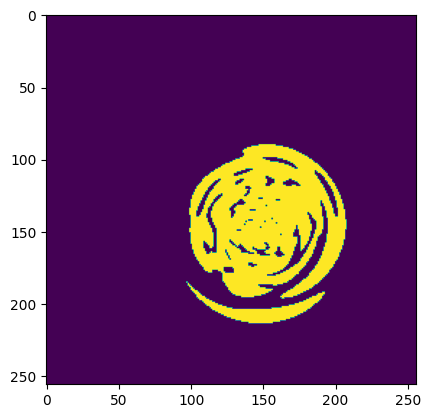

In [4]:
# support = speckleret.supports.disk_support(shifted_field, radius=50, offsets=shift)
support = speckleret.supports.threshold_support(shifted_field, threshold=0.01)
supported_field = shifted_field * support
_ = speckleret.plots.complex_imshow(supported_field)
plt.show()

plt.imshow(support)

## Run retrieval and show convergence and metrics

In [5]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(shifted_field), np.abs(ft)), support, pad=2, max_iter=2, max_er_iter=200, max_hio_iter=100)

1 / 2
2 / 2


Quality: 0.9890667481295211
Pearson: 1.0


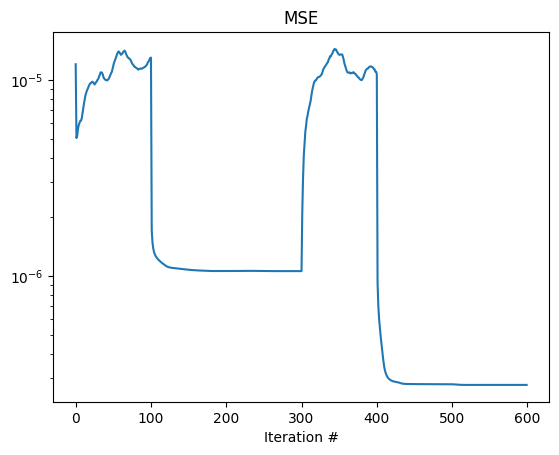

In [6]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], shifted_field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], shifted_field[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

## Compare retrieved field with initial field

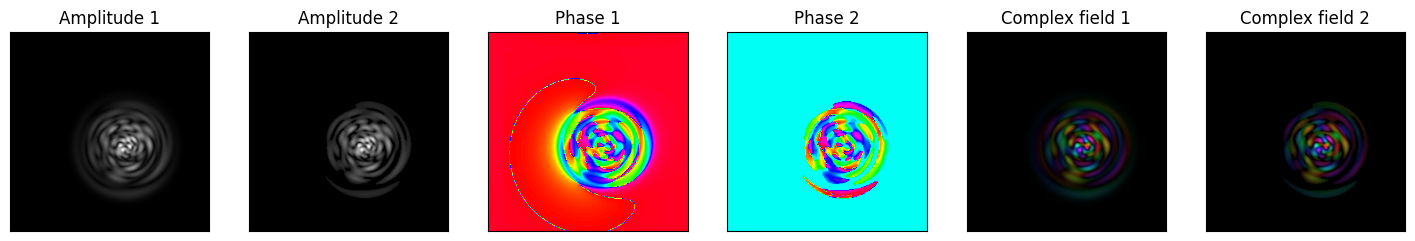

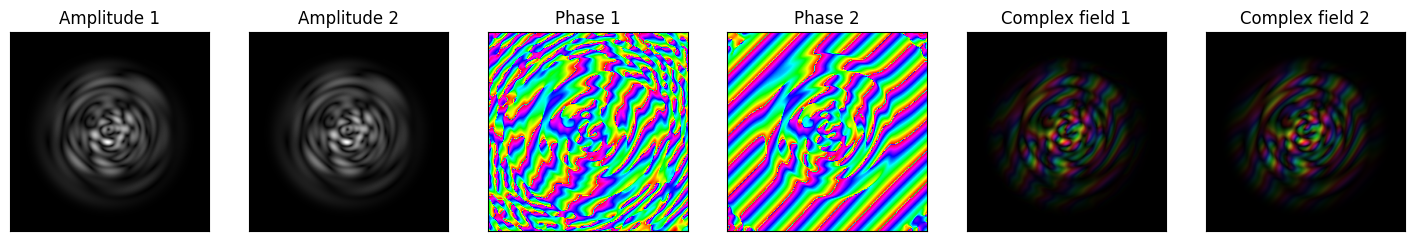

In [8]:
_ = speckleret.plots.compare_complex_fields(shifted_field, y_hat, remove_ticks=True, figsize=(18,9))
_ = speckleret.plots.compare_complex_fields(ft_hat, shifted_ft, remove_ticks=True, figsize=(18,9))

## Generate a Fourier transform

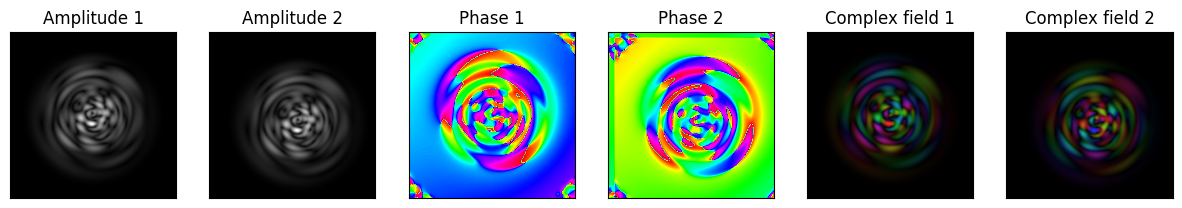

In [10]:
shift_ft = (10,10)
ft_shifted = np.roll(ft, shift=shift_ft, axis=(0,1))

_ = speckleret.plots.compare_complex_fields(ft, ft_shifted, remove_ticks=True)

## Generate and visualize support

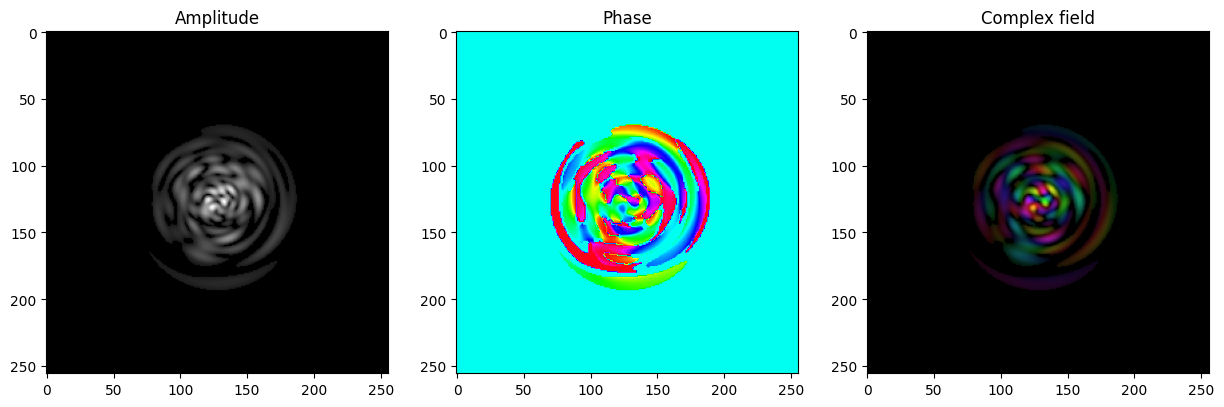

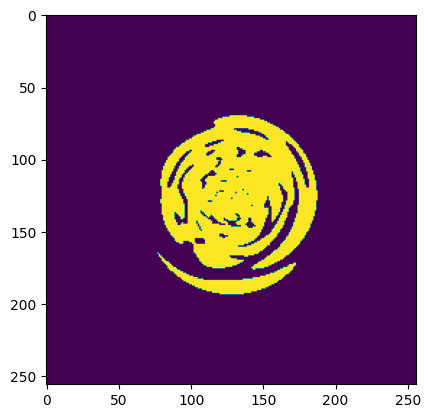

In [12]:
support = speckleret.supports.threshold_support(field, threshold=0.01)
supported_field = field * support
_ = speckleret.plots.complex_imshow(supported_field)
plt.show()

plt.imshow(support)

## Run retrieval and show convergence metrics

In [14]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(field), np.abs(ft_shifted)), support, pad=2, max_iter=2, max_er_iter=200, max_hio_iter=100)

1 / 2
2 / 2


Quality: 0.028439171077076716
Quality conj: 0.016132114044966065
Pearson: 1.0000000000000002


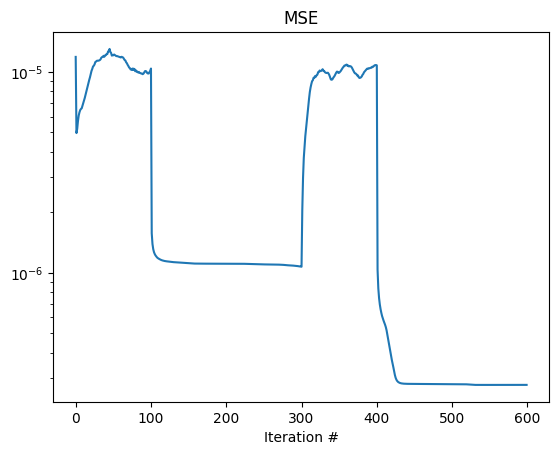

In [18]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], field[support])}")
print(f"Quality conj: {speckleret.metrics.quality(np.conjugate(y_hat[support]), field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], field[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

## Compare retrieved field with initial field

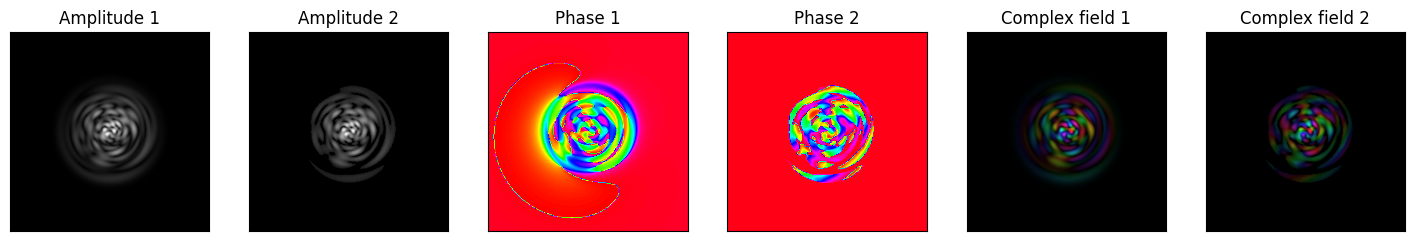

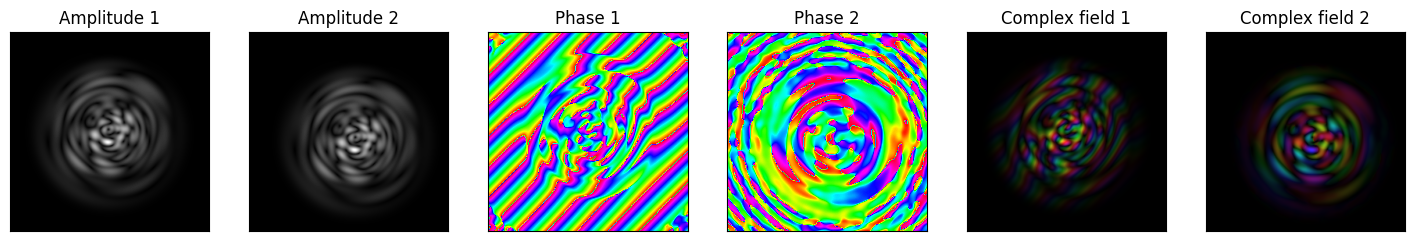

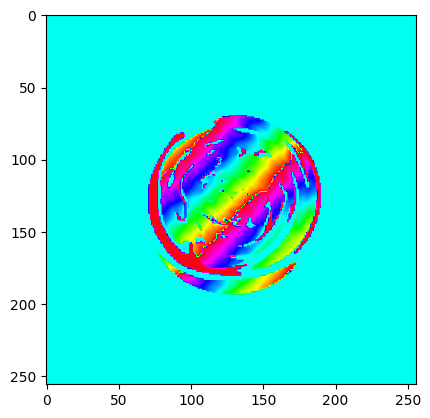

In [21]:
_ = speckleret.plots.compare_complex_fields(field, y_hat, remove_ticks=True, figsize=(18,9))
_ = speckleret.plots.compare_complex_fields(shifted_ft, ft_hat, remove_ticks=True, figsize=(18,9))

y_ret = y_hat.copy()
y_ret = y_hat * support
phi_diff = np.angle(np.exp(1j * (np.angle(supported_field) - np.angle(y_ret))))

plt.figure()
plt.imshow(phi_diff, cmap='hsv')
